# USAGE EXAMPLE

In [1]:
# LIBRARIES
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from functions import QAA
from datetime import datetime
from scipy.optimize import minimize
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list

c:\Users\diego\OneDrive - ITESO\ITESO - TITA\Semestres - TITA\10mo Sem -TITA\PAP\PAP\venvPAP\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\diego\OneDrive - ITESO\ITESO - TITA\Semestres - TITA\10mo Sem -TITA\PAP\PAP\venvPAP\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\diego\OneDrive - ITESO\ITESO - TITA\Semestres - TITA\10mo Sem -TITA\PAP\PAP\venvPAP\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_erro


Optimal Portfolio Weights for MIN VARIANCE QAA using SLSQP optimization:
ABBV    0.25
MET     0.25
OXY     0.25
PERI    0.25
Name: Optimal Weights, dtype: float64

---

Portfolio Return: 0.13%
Benchmark Return (SPY): 0.06%
Risk-Free Rate Return: 0.01%

---

Portfolio Volatility: 2.23%
Benchmark Volatility (SPY): 1.42%
Risk-Free Rate Volatility: 0.00%

---



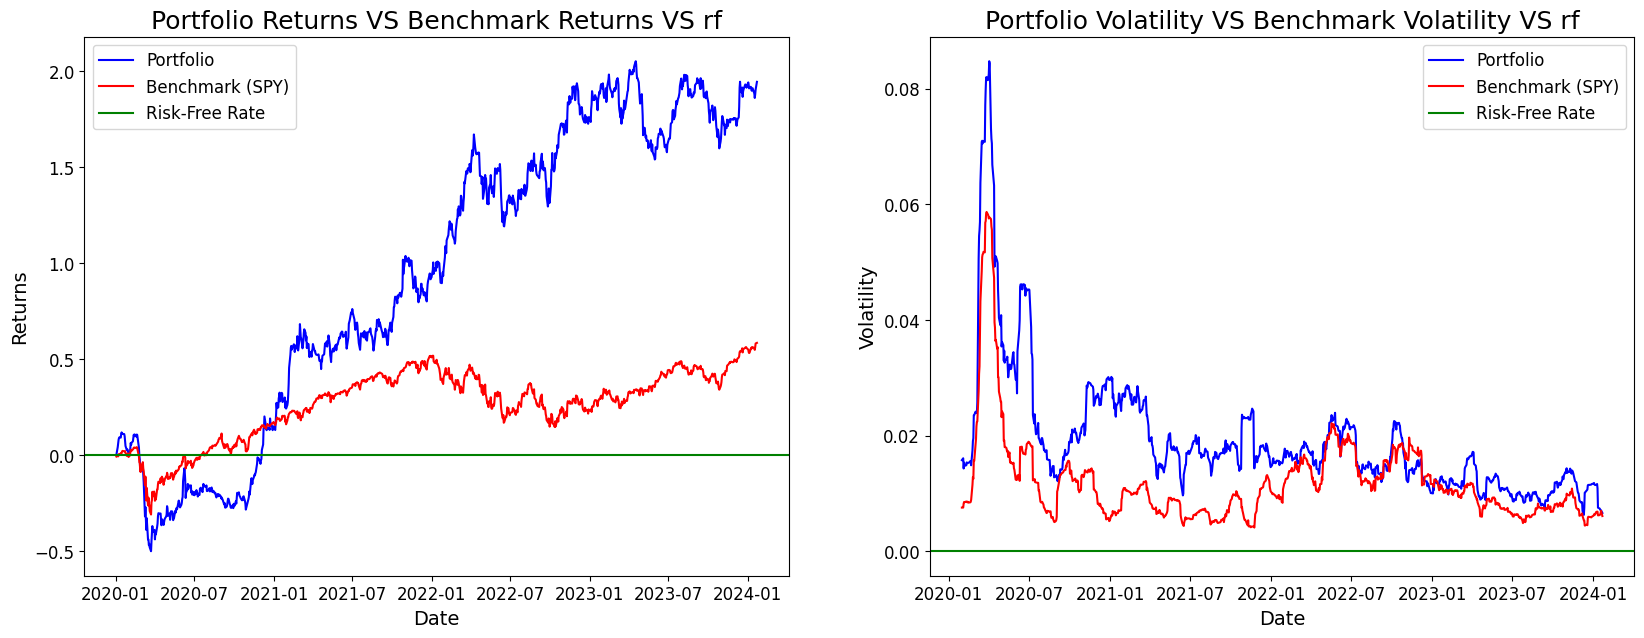

In [25]:
# EXAMPLE
qaa_instance = QAA(
    tickers=["ABBV", "MET", "OXY", "PERI"],
    benchmark="SPY",
    rf=0.02,
    lower_bound=0.10,
    higher_bound=0.90,
    start_date="2020-01-02",
    end_date="2024-01-23",
    expected_returns=np.array([.15, .1, .1, .1]),
    opinions=np.array([[1, 0, 0, 0], [0, 1, -3, 0], [0, 0, 1, -1], [0, 0, 0, 0]]),
    MAR=0.2,
    optimization_model="SLSQP",
    #optimization_model="MONTECARLO",
    #optimization_model="GRADIENT DESCENT",
    QAA_strategy="MIN VARIANCE",
    #QAA_strategy="MAX SHARPE RATIO",
    #QAA_strategy="OMEGA",
    #QAA_strategy="SEMIVARIANCE",
    #QAA_strategy="SORTINO RATIO",
    #QAA_strategy="BLACK LITTERMAN",
    #QAA_strategy="HRP",
    #QAA_strategy="ROY SAFETY FIRST RATIO",
    #QAA_strategy="MARTINGALE"
    #QAA_strategy=""
    #QAA_strategy=""
)

try:
    data, returns, std, var, cov, corr = qaa_instance.assets_metrics()

    optimal_weights = qaa_instance.QAA_strategy_selection(returns=returns)

    qaa_instance.portfolio_metrics(returns)

except ValueError as ve:
    print(f"Error: {str(ve)}")